In [1]:
from virtuoso.dataset import ScorePerformDataset
from virtuoso.pyScoreParser import data_for_training as dft, data_class

import matplotlib.pyplot as plt
import numpy as np

In [4]:
dataset = data_class.YamahaDataset('/home/svcapp/userdata/chopin_cleaned/', save=False, features_only=True)
pair_set = dft.PairDataset(dataset)


100%|██████████| 257/257 [02:30<00:00,  1.71it/s]


In [5]:
squeezed_values = pair_set.get_squeezed_features(dft.VNET_INPUT_KEYS)

In [ ]:
np.asarray(squeezed_values['notation']).shape

In [ ]:
squeezed_values['notation'][0]

In [ ]:
plt.hist(np.asarray(squeezed_values['notation'])[:,0], 20)

In [2]:
dataset_path = 'dataset_beat/'
norm_dataset = ScorePerformDataset(dataset_path, 'entire', len_slice=1000, len_graph_slice=400, graph_keys=['forward', 'onset'])

In [4]:
input_features = np.concatenate([x['input_data'] for x in norm_dataset.data])
output_features = np.concatenate([x['output_data'] for x in norm_dataset.data])

In [ ]:
VNET_INPUT_KEYS = ('midi_pitch', 'duration', 'beat_importance', 'measure_length', 'qpm_primo',
                          'following_rest', 'distance_from_abs_dynamic', 'distance_from_recent_tempo',
                          'beat_position', 'xml_position', 'grace_order', 'preceded_by_grace_note',
                          'followed_by_fermata_rest', 'pitch', 'tempo', 'dynamic', 'time_sig_vec',
                          'slur_beam_vec',  'composer_vec', 'notation', 'tempo_primo')



(array([3.147504e+06, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 3.117000e+03]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <BarContainer object of 20 artists>)

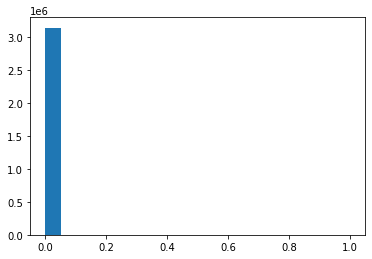

In [31]:
idx = -11
plt.hist(input_features[np.abs(input_features[:,idx])<5,idx], 20)